<a href="https://colab.research.google.com/github/sochicodes31/Decoding-Vaccine-Hesitancy/blob/main/RedditPullClean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
files = ['VaxxHesAntiCon.csv', 'VaxxHesAntiTop.csv', 'VaxxHesUVTop.csv', 'VaxxHesUVCon.csv', 'VaxxHesDVTop.csv', 'VaxxHesDVCon.csv', 'VaxxHesVHTop.csv', 'VaxxHesVHCon.csv', 'VaxxHesVMTop.csv', 'VaxxHesVMCon.csv' ]
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('merged_reddit_files.csv', index=False)


In [ ]:
reddit_posts = pd.read_csv('merged_reddit_files.csv', error_bad_lines=False);

data_text = reddit_posts[['Title']]
data_text['index'] = data_text.index
documents = data_text

<ipython-input-5-24beee17805a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  reddit_posts = pd.read_csv('merged_reddit_files.csv', error_bad_lines=False);
<ipython-input-5-24beee17805a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


In [ ]:
print(len(documents))
print(documents[:20])

6014
                                                Title  index
0   Video shows expert discussing the risks with v...      0
1   9/10 doctors suggest not getting the vaccine a...      1
2                Does the shot contain jellyfish DNA?      2
3   Vaccinations purported to cause repeated 5-sec...      3
4   New study shows that vaccines turn humans into...      4
5   New study shows that vaccines turn humans into...      5
6                Does the shot contain jellyfish DNA?      6
7   Video shows expert discussing the risks with v...      7
8   Vaccinations purported to cause repeated 5-sec...      8
9   9/10 doctors suggest not getting the vaccine a...      9
10          Never forget how easily they turned on us     10
11           How do you think these tattoos will age?     11
12  American CDC recommend the vaccine to everyone...     12
13                            Life comes at you fast.     13
14  Condoms don't need to prevent STDs or pregnanc...     14
15                 

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from nltk import FreqDist

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import pandas as pd
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer

def lemmatize_stemming(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

def preprocess_corpus(docs):
    processed_corpus = []
    for index, row in documents.iterrows():
        title = row['Title']
        tokens = []
        for token in simple_preprocess(title):
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                tokens.append(lemmatize_stemming(token))
        processed_corpus.append((tokens))
    return processed_corpus

# Assuming `df` is your DataFrame with "Title" column and index

# Remove the index column
df_without_index = documents.drop(columns=['index'])

# Preprocess the corpus
processed_corpus = preprocess_corpus(df_without_index)

# Print the processed corpus (processed words only)
for tokens in processed_corpus:
    print(f"Processed Words: {tokens}")

Streaming output truncated to the last 5000 lines.
Processed Words: ['guy', 'live']
Processed Words: ['vaxx', 'subreddit']
Processed Words: ['vaxxed', 'chance']
Processed Words: ['believe', 'vaccine', 'believe', 'science', 'think', 'people', 'right']
Processed Words: ['question', 'suppose']
Processed Words: ['scar', 'boyfriend', 'send', 'spain', 'vaccinate']
Processed Words: ['anti', 'unwise']
Processed Words: ['doubt', 'subreddit']
Processed Words: ['vaccinate', 'owe', 'thank', 'unvaccinated']
Processed Words: []
Processed Words: ['date', 'vaccinate', 'person']
Processed Words: ['vaccine', 'people', 'belong']
Processed Words: ['haven', 'vaccinate', 'covid', 'need', 'vaccinate']
Processed Words: ['vaccine', 'shed', 'naturally', 'immune']
Processed Words: ['triple', 'vaxxed', 'likely']
Processed Words: ['mind', 'vaxzi']
Processed Words: ['nonsense', 'unvaxxed', 'grandpa']
Processed Words: ['vaccinate', 'like', 'polite', 'respectful', 'discussion', 'hear', 'argument', 'learn', 'want', 'v

In [ ]:
import nltk
import numpy as np
from nltk import FreqDist
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from itertools import chain

# Example lists to be merged
processed_corpus

merged_list = []
for sublist in processed_corpus :
    merged_list.extend(sublist)

print(merged_list)

['video', 'show', 'expert', 'discuss', 'risk', 'vaccine', 'supporters', 'doctor', 'suggest', 'get', 'vaccine', 'effect', 'include', 'possess', 'shoot', 'contain', 'jellyfish', 'vaccinations', 'purport', 'cause', 'repeat', 'second', 'music', 'loop', 'study', 'show', 'vaccines', 'turn', 'humans', 'vampires', 'study', 'show', 'vaccines', 'turn', 'humans', 'vampires', 'shoot', 'contain', 'jellyfish', 'video', 'show', 'expert', 'discuss', 'risk', 'vaccine', 'supporters', 'vaccinations', 'purport', 'cause', 'repeat', 'second', 'music', 'loop', 'doctor', 'suggest', 'get', 'vaccine', 'effect', 'include', 'possess', 'forget', 'easily', 'turn', 'think', 'tattoo', 'american', 'recommend', 'vaccine', 'months', 'older', 'swedish', 'recommend', 'vaccine', 'people', 'age', 'older', 'american', 'swedish', 'medical', 'experts', 'come', 'different', 'result', 'data', 'life', 'come', 'fast', 'condoms', 'need', 'prevent', 'stds', 'pregnancy', 'cars', 'need', 'point', 'vaccinations', 'prevent', 'family', '

In [ ]:
fdist = FreqDist(merged_list)
words_to_remove = fdist.most_common(10)
words_to_remove

[('covid', 1421),
 ('vaccine', 1118),
 ('vaccines', 712),
 ('people', 465),
 ('vaccinate', 383),
 ('unvaccinated', 285),
 ('anti', 281),
 ('cause', 225),
 ('deaths', 225),
 ('study', 214)]

In [ ]:
def remove_words_from_corpus(corpus, words_to_remove):
    processed_corpus = []
    for tokens in corpus:
        filtered_tokens = [token for token in tokens if token not in words_to_remove]
        processed_corpus.append(filtered_tokens)
    return processed_corpus, filtered_tokens

# Assuming `processed_corpus` is your processed corpus list and `words_to_remove` is your list of words to remove

# Define words to remove
words_to_remove = ['covid', 'vaccine', 'vaccines', 'people', 'vaccinate', 'unvaccinated', 'anti', 'cause', 'deaths', 'study']  # List of words to remove

# Make a copy of the processed corpus
filtered_corpus = processed_corpus[:]

# Loop through the words to remove
for word in words_to_remove:
    filtered_corpus, _ = remove_words_from_corpus(filtered_corpus, [word])

# Print the filtered corpus (filtered words)
for tokens in filtered_corpus:
    print(f"Filtered Words: {tokens}")

Streaming output truncated to the last 5000 lines.
Filtered Words: ['guy', 'live']
Filtered Words: ['vaxx', 'subreddit']
Filtered Words: ['vaxxed', 'chance']
Filtered Words: ['believe', 'believe', 'science', 'think', 'right']
Filtered Words: ['question', 'suppose']
Filtered Words: ['scar', 'boyfriend', 'send', 'spain']
Filtered Words: ['unwise']
Filtered Words: ['doubt', 'subreddit']
Filtered Words: ['owe', 'thank']
Filtered Words: []
Filtered Words: ['date', 'person']
Filtered Words: ['belong']
Filtered Words: ['haven', 'need']
Filtered Words: ['shed', 'naturally', 'immune']
Filtered Words: ['triple', 'vaxxed', 'likely']
Filtered Words: ['mind', 'vaxzi']
Filtered Words: ['nonsense', 'unvaxxed', 'grandpa']
Filtered Words: ['like', 'polite', 'respectful', 'discussion', 'hear', 'argument', 'learn', 'want']
Filtered Words: ['best', 'country', 'unvaxx', 'woman', 'marriage']
Filtered Words: ['directly', 'decrease', 'cognitive', 'abilities']
Filtered Words: ['see', 'comment', 'say', 'toxic',

In [ ]:
import nltk
import numpy as np
from nltk import FreqDist
import matplotlib.pyplot as plt
nltk.download('punkt')

from itertools import chain

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Example lists to be merged
filtered_corpus

merged_list2 = []
for sublist in filtered_corpus :
    merged_list2.extend(sublist)

print(merged_list2)

['video', 'show', 'expert', 'discuss', 'risk', 'supporters', 'doctor', 'suggest', 'get', 'effect', 'include', 'possess', 'shoot', 'contain', 'jellyfish', 'vaccinations', 'purport', 'repeat', 'second', 'music', 'loop', 'show', 'turn', 'humans', 'vampires', 'show', 'turn', 'humans', 'vampires', 'shoot', 'contain', 'jellyfish', 'video', 'show', 'expert', 'discuss', 'risk', 'supporters', 'vaccinations', 'purport', 'repeat', 'second', 'music', 'loop', 'doctor', 'suggest', 'get', 'effect', 'include', 'possess', 'forget', 'easily', 'turn', 'think', 'tattoo', 'american', 'recommend', 'months', 'older', 'swedish', 'recommend', 'age', 'older', 'american', 'swedish', 'medical', 'experts', 'come', 'different', 'result', 'data', 'life', 'come', 'fast', 'condoms', 'need', 'prevent', 'stds', 'pregnancy', 'cars', 'need', 'point', 'vaccinations', 'prevent', 'family', 'members', 'get', 'go', 'great', 'awaken', 'confirm', 'graphene', 'oxide', 'mrna', 'force', 'publish', 'confidential', 'pfizer', 'documen

In [ ]:
fdist_new = FreqDist(merged_list2)
top_ten_new = fdist_new.most_common(10)
print(top_ten_new)

[('die', 211), ('vaccination', 211), ('know', 205), ('mrna', 204), ('pfizer', 202), ('say', 166), ('like', 163), ('death', 161), ('think', 154), ('get', 142)]


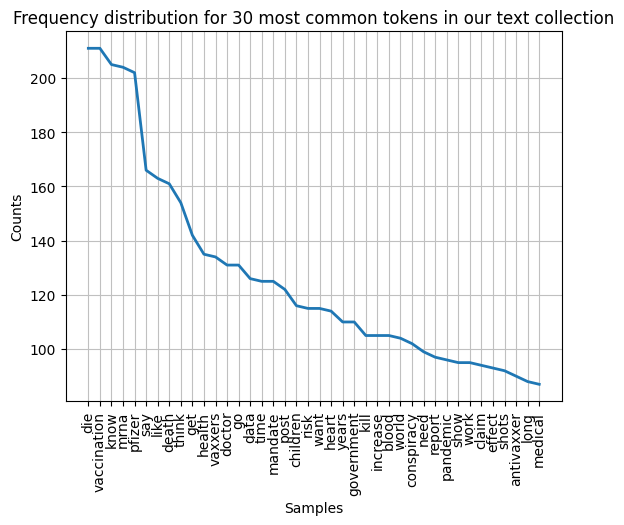

<Axes: title={'center': 'Frequency distribution for 30 most common tokens in our text collection'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
#Shows the frequency distribution for top 30 tokens after top 10 were removed
fdist_new.plot(40,title='Frequency distribution for 30 most common tokens in our text collection')

In [ ]:
dictionary = gensim.corpora.Dictionary(filtered_corpus)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 discuss
1 expert
2 risk
3 show
4 supporters
5 video
6 doctor
7 effect
8 get
9 include
10 possess


In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in filtered_corpus]
bow_corpus[1237]

[(309, 1), (768, 1), (1328, 1), (1752, 1), (2344, 1)]

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.44692995415028614),
 (1, 0.4559880296570543),
 (2, 0.3142885733124958),
 (3, 0.3206348324260954),
 (4, 0.5092943437949612),
 (5, 0.3624414451900417)]


In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=10, workers=2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.011*"pfizer" + 0.009*"vaccination" + 0.009*"kill" + 0.007*"risk" + 0.007*"pandemic" + 0.006*"children" + 0.006*"think" + 0.006*"blood" + 0.006*"data" + 0.006*"autism"
Topic: 1 
Words: 0.015*"know" + 0.012*"die" + 0.012*"conspiracy" + 0.011*"go" + 0.011*"work" + 0.010*"say" + 0.008*"like" + 0.008*"antivaxxers" + 0.008*"want" + 0.006*"years"
Topic: 2 
Words: 0.012*"time" + 0.008*"news" + 0.008*"death" + 0.007*"post" + 0.007*"case" + 0.006*"year" + 0.005*"say" + 0.005*"shoot" + 0.005*"get" + 0.005*"report"
Topic: 3 
Words: 0.010*"believe" + 0.006*"antivaxx" + 0.006*"twitter" + 0.005*"long" + 0.005*"start" + 0.005*"real" + 0.005*"vaxxers" + 0.005*"right" + 0.005*"conspiracy" + 0.004*"die"
Topic: 4 
Words: 0.015*"vaxxers" + 0.010*"antivaxxer" + 0.009*"get" + 0.009*"claim" + 0.008*"doctor" + 0.007*"say" + 0.007*"like" + 0.006*"sure" + 0.006*"true" + 0.006*"blood"


In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.007*"go" + 0.006*"think" + 0.006*"vaxxers" + 0.004*"travel" + 0.004*"question" + 0.004*"come" + 0.004*"mandate" + 0.003*"die" + 0.003*"believe" + 0.003*"post"
Topic: 1 Word: 0.006*"unvaxxed" + 0.005*"need" + 0.004*"want" + 0.004*"like" + 0.003*"death" + 0.003*"mandate" + 0.003*"antivaxxer" + 0.003*"time" + 0.003*"autism" + 0.003*"test"
Topic: 2 Word: 0.004*"effect" + 0.004*"vaccination" + 0.004*"know" + 0.004*"vaxx" + 0.003*"right" + 0.003*"time" + 0.003*"get" + 0.003*"sure" + 0.003*"natural" + 0.003*"cancer"
Topic: 3 Word: 0.007*"work" + 0.006*"die" + 0.005*"know" + 0.005*"pfizer" + 0.004*"think" + 0.004*"booster" + 0.003*"conspiracy" + 0.003*"blood" + 0.003*"suddenly" + 0.003*"mrna"
Topic: 4 Word: 0.005*"mrna" + 0.004*"doctor" + 0.004*"true" + 0.003*"safe" + 0.003*"years" + 0.003*"antivaxxers" + 0.003*"date" + 0.003*"heart" + 0.003*"shots" + 0.003*"pfizer"


In [ ]:
filtered_corpus[1237]

['shift', 'update', 'tie', 'safety', 'concern']

In [ ]:
for index, score in sorted(lda_model[bow_corpus[1237]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.5542354583740234	 
Topic: 0.011*"pfizer" + 0.009*"vaccination" + 0.009*"kill" + 0.007*"risk" + 0.007*"pandemic" + 0.006*"children" + 0.006*"think" + 0.006*"blood" + 0.006*"data" + 0.006*"autism"

Score: 0.34465986490249634	 
Topic: 0.010*"believe" + 0.006*"antivaxx" + 0.006*"twitter" + 0.005*"long" + 0.005*"start" + 0.005*"real" + 0.005*"vaxxers" + 0.005*"right" + 0.005*"conspiracy" + 0.004*"die"

Score: 0.03394380211830139	 
Topic: 0.012*"time" + 0.008*"news" + 0.008*"death" + 0.007*"post" + 0.007*"case" + 0.006*"year" + 0.005*"say" + 0.005*"shoot" + 0.005*"get" + 0.005*"report"

Score: 0.033666860312223434	 
Topic: 0.015*"know" + 0.012*"die" + 0.012*"conspiracy" + 0.011*"go" + 0.011*"work" + 0.010*"say" + 0.008*"like" + 0.008*"antivaxxers" + 0.008*"want" + 0.006*"years"

Score: 0.0334940068423748	 
Topic: 0.015*"vaxxers" + 0.010*"antivaxxer" + 0.009*"get" + 0.009*"claim" + 0.008*"doctor" + 0.007*"say" + 0.007*"like" + 0.006*"sure" + 0.006*"true" + 0.006*"blood"


In [ ]:
#visualize the clusters
#ask ChatGPT for journal articles on

In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import re

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=bow_corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[bow_corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=filtered_corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(5)

Streaming output truncated to the last 5000 lines.
<ipython-input-27-d06f4ba95c08>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-27-d06f4ba95c08>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-27-d06f4ba95c08>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-27-d06f4ba95c08>:15: FutureWarning: The frame.app

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.8837,"believe, antivaxx, twitter, long, start, real,...","[video, show, expert, discuss, risk, supporters]"
1,1,4,0.4590,"vaxxers, antivaxxer, get, claim, doctor, say, ...","[doctor, suggest, get, effect, include, possess]"
2,2,2,0.7992,"time, news, death, post, case, year, say, shoo...","[shoot, contain, jellyfish]"
3,3,1,0.8738,"know, die, conspiracy, go, work, say, like, an...","[vaccinations, purport, repeat, second, music,..."
4,4,1,0.8374,"know, die, conspiracy, go, work, say, like, an...","[show, turn, humans, vampires]"


In [ ]:

# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9664,"pfizer, vaccination, kill, risk, pandemic, children, think, blood, data, autism","[pfizer, withhold, evidence, myocarditis, shots, document, reveal, pfizer, center, disease, cont..."
1,1,0.9687,"know, die, conspiracy, go, work, say, like, antivaxxers, want, years","[germ, theory, documentary, easy, understand, step, step, analysis, history, germ, virus, theory..."
2,2,0.9661,"time, news, death, post, case, year, say, shoot, get, report","[arrest, warrant, issue, woman, refuse, tuberculosis, treatment, police, dispatch, arrest, washi..."
3,3,0.9684,"believe, antivaxx, twitter, long, start, real, vaxxers, right, conspiracy, die","[look, like, ruffle, jab, feather, lurkers, join, vaxxed, group, jerk, know, logic, guy, strengt..."
4,4,0.9645,"vaxxers, antivaxxer, get, claim, doctor, say, like, sure, true, blood","[canadian, court, rule, legal, deny, person, organ, transplant, accord, justice, belzil, canadia..."


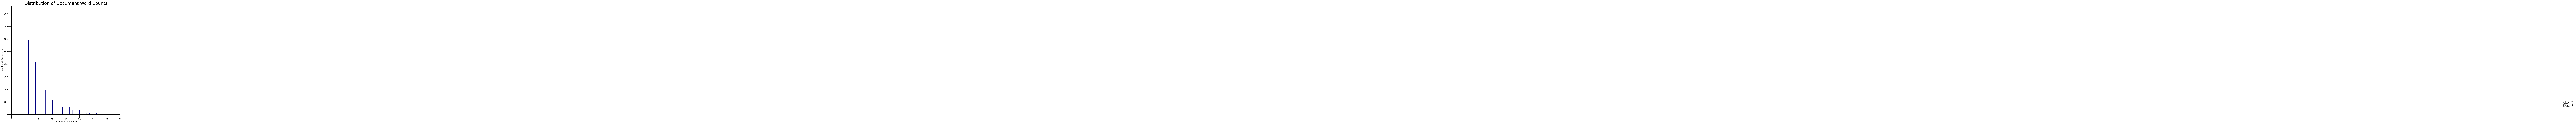

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(10,10), dpi=160)
plt.hist(doc_lens, bins = 320, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 32), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,32,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# Remove extra white space to the right
fig.subplots_adjust(right=0.15)
plt.show()

<ipython-input-38-d12e03769866>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-38-d12e03769866>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-38-d12e03769866>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-38-d12e03769866>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, col

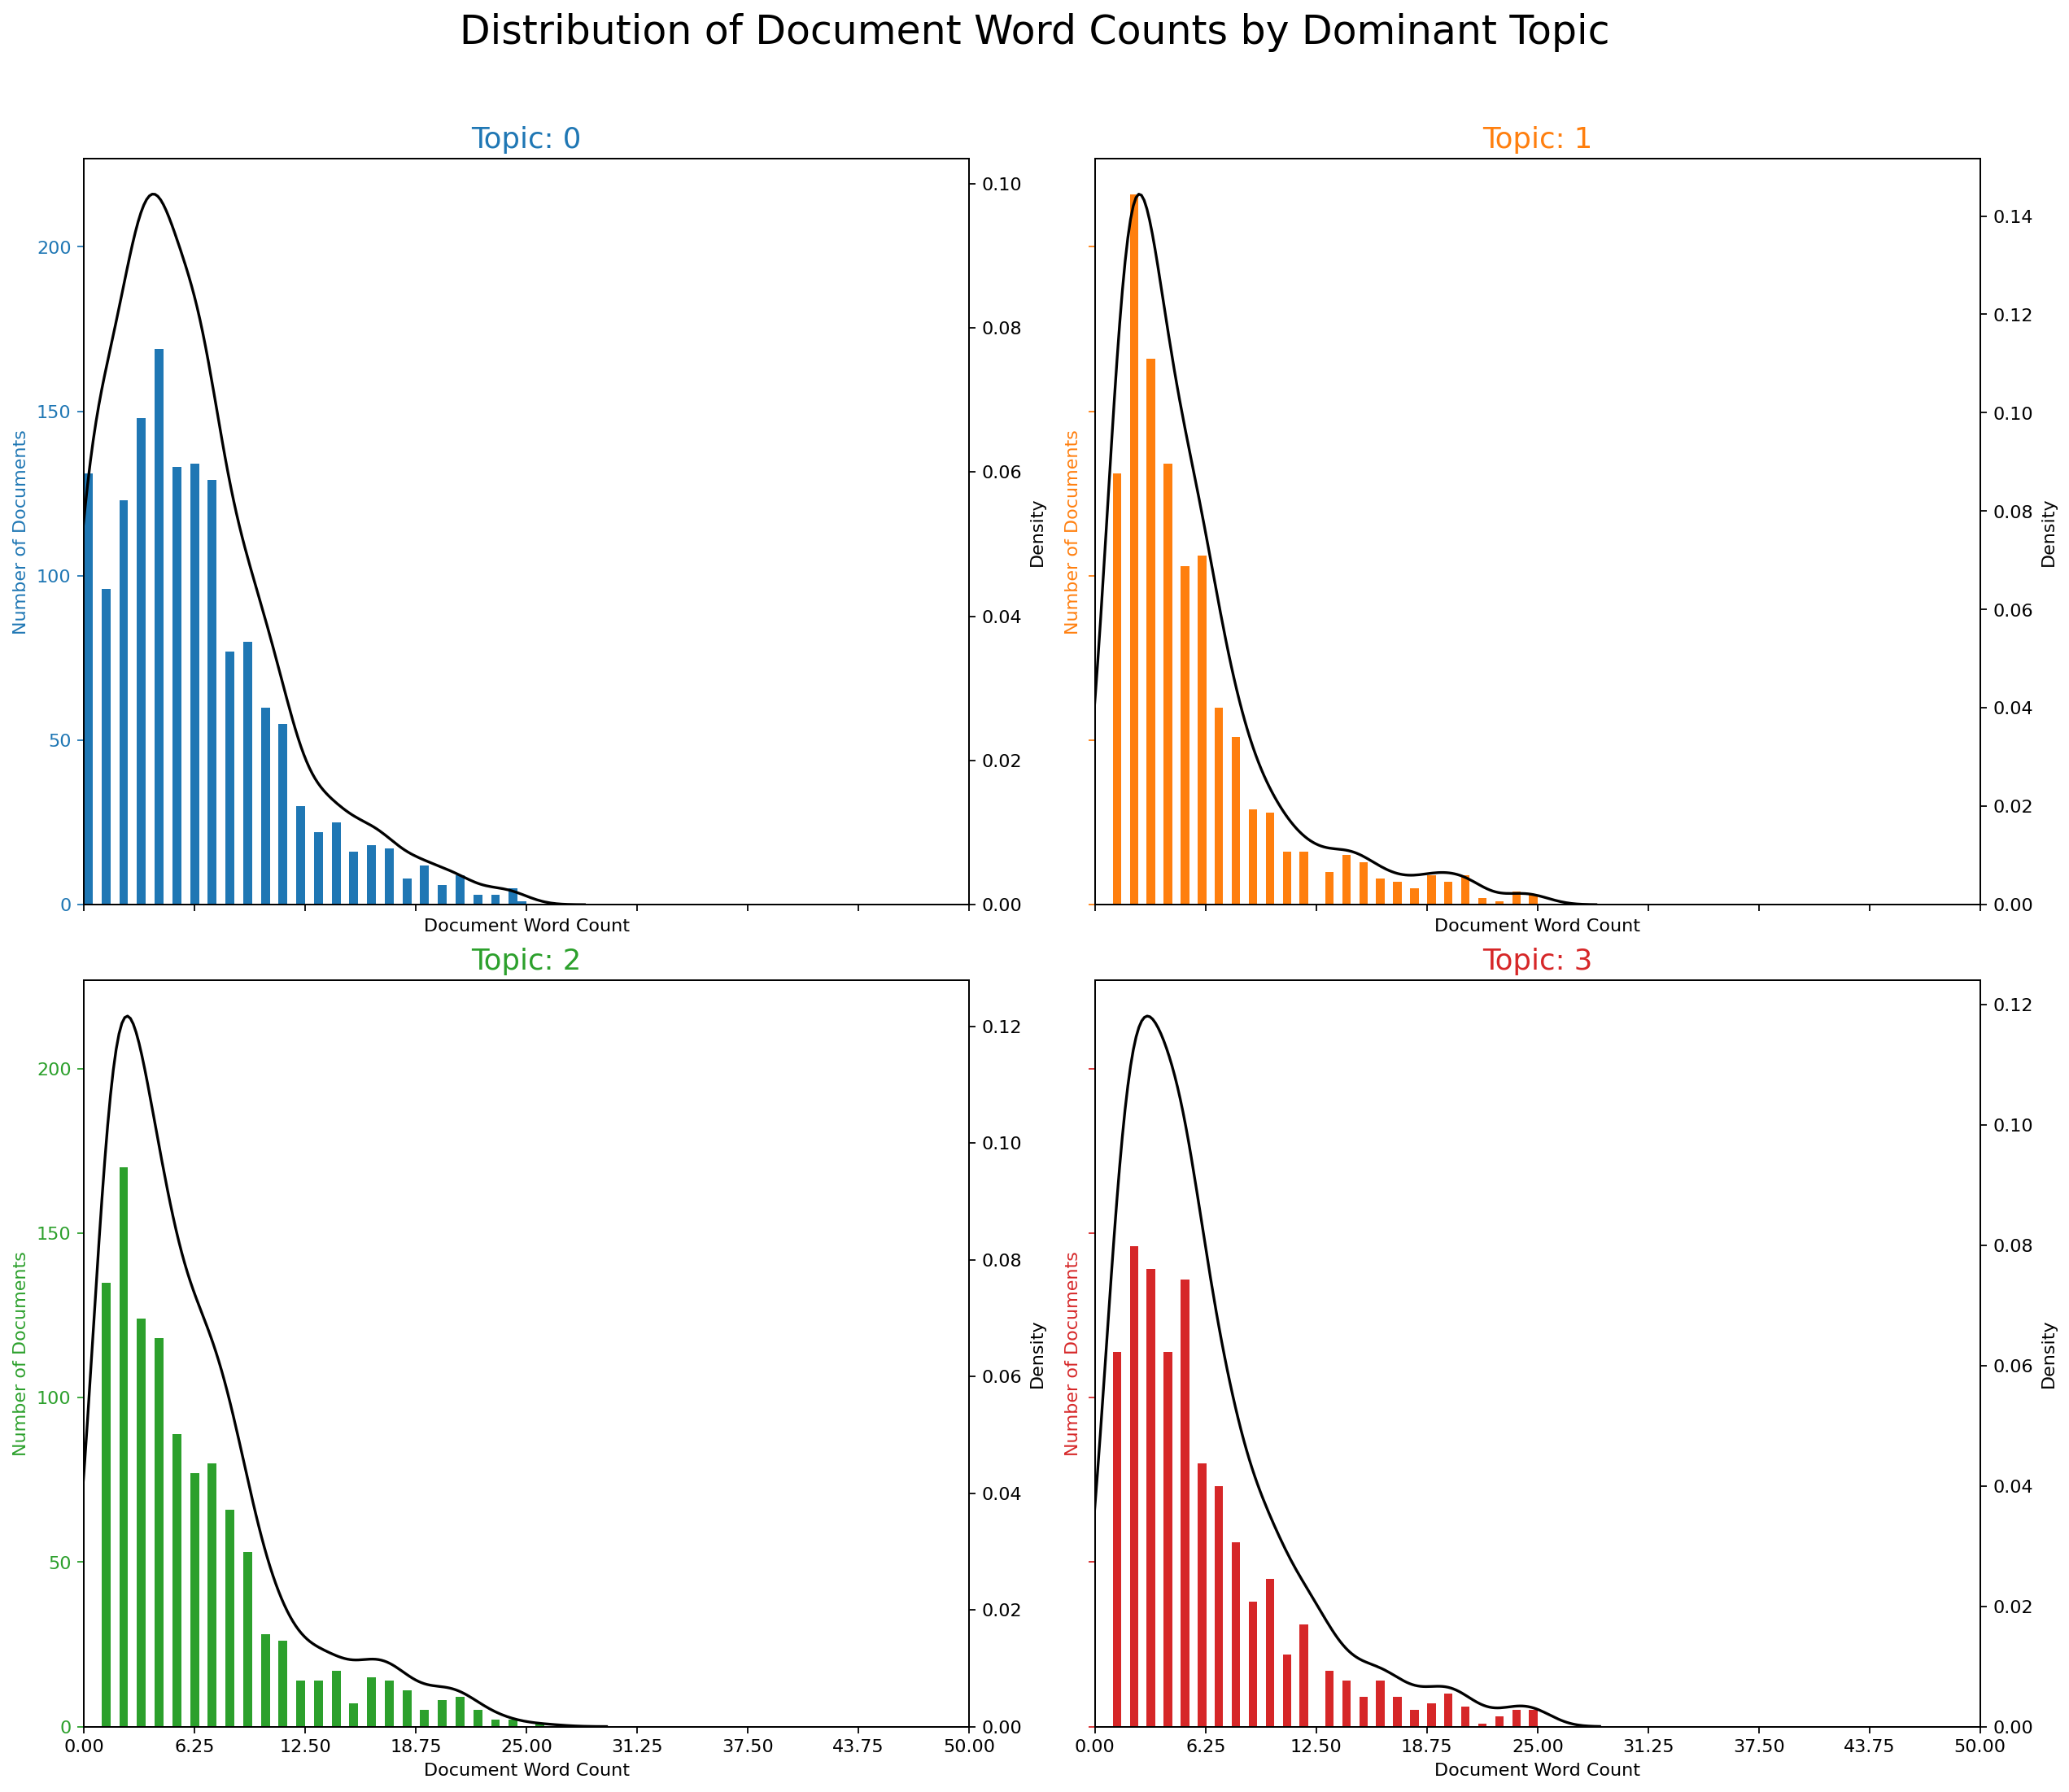

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 50, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['vaccination', 'covid', 'vaccine', 'vaccines', 'people', 'vaccinate','unvaccinated', 'anti', 'cause','deaths','study'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


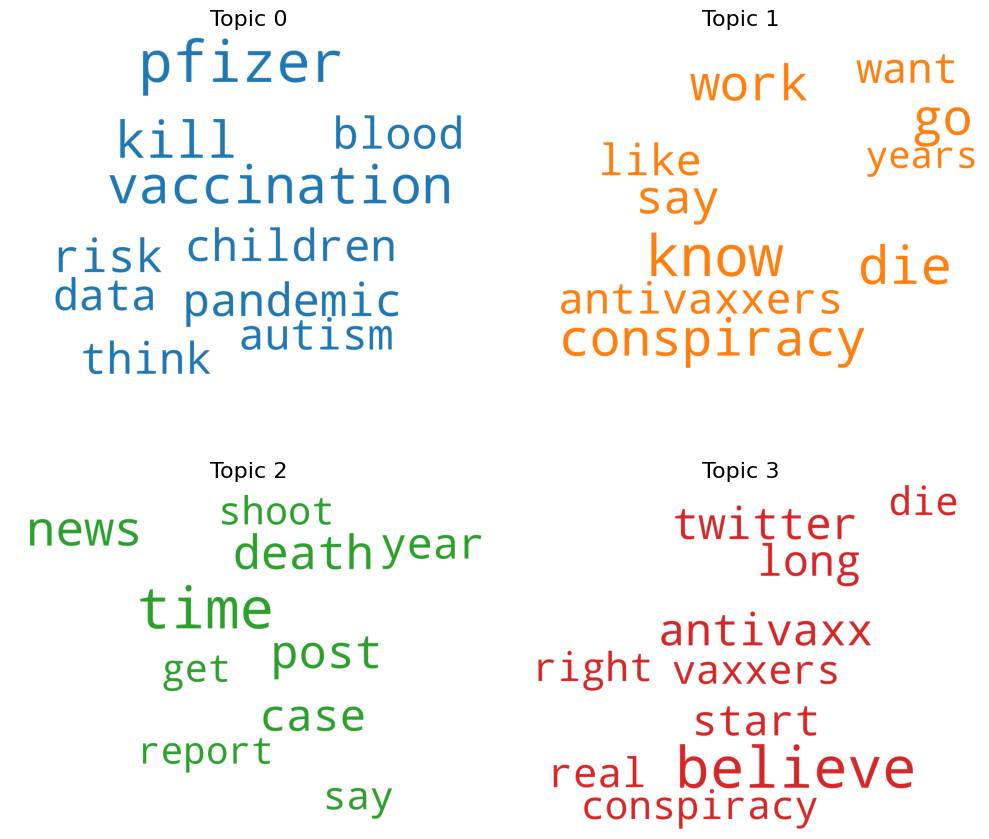

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

<ipython-input-33-311356004d99>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


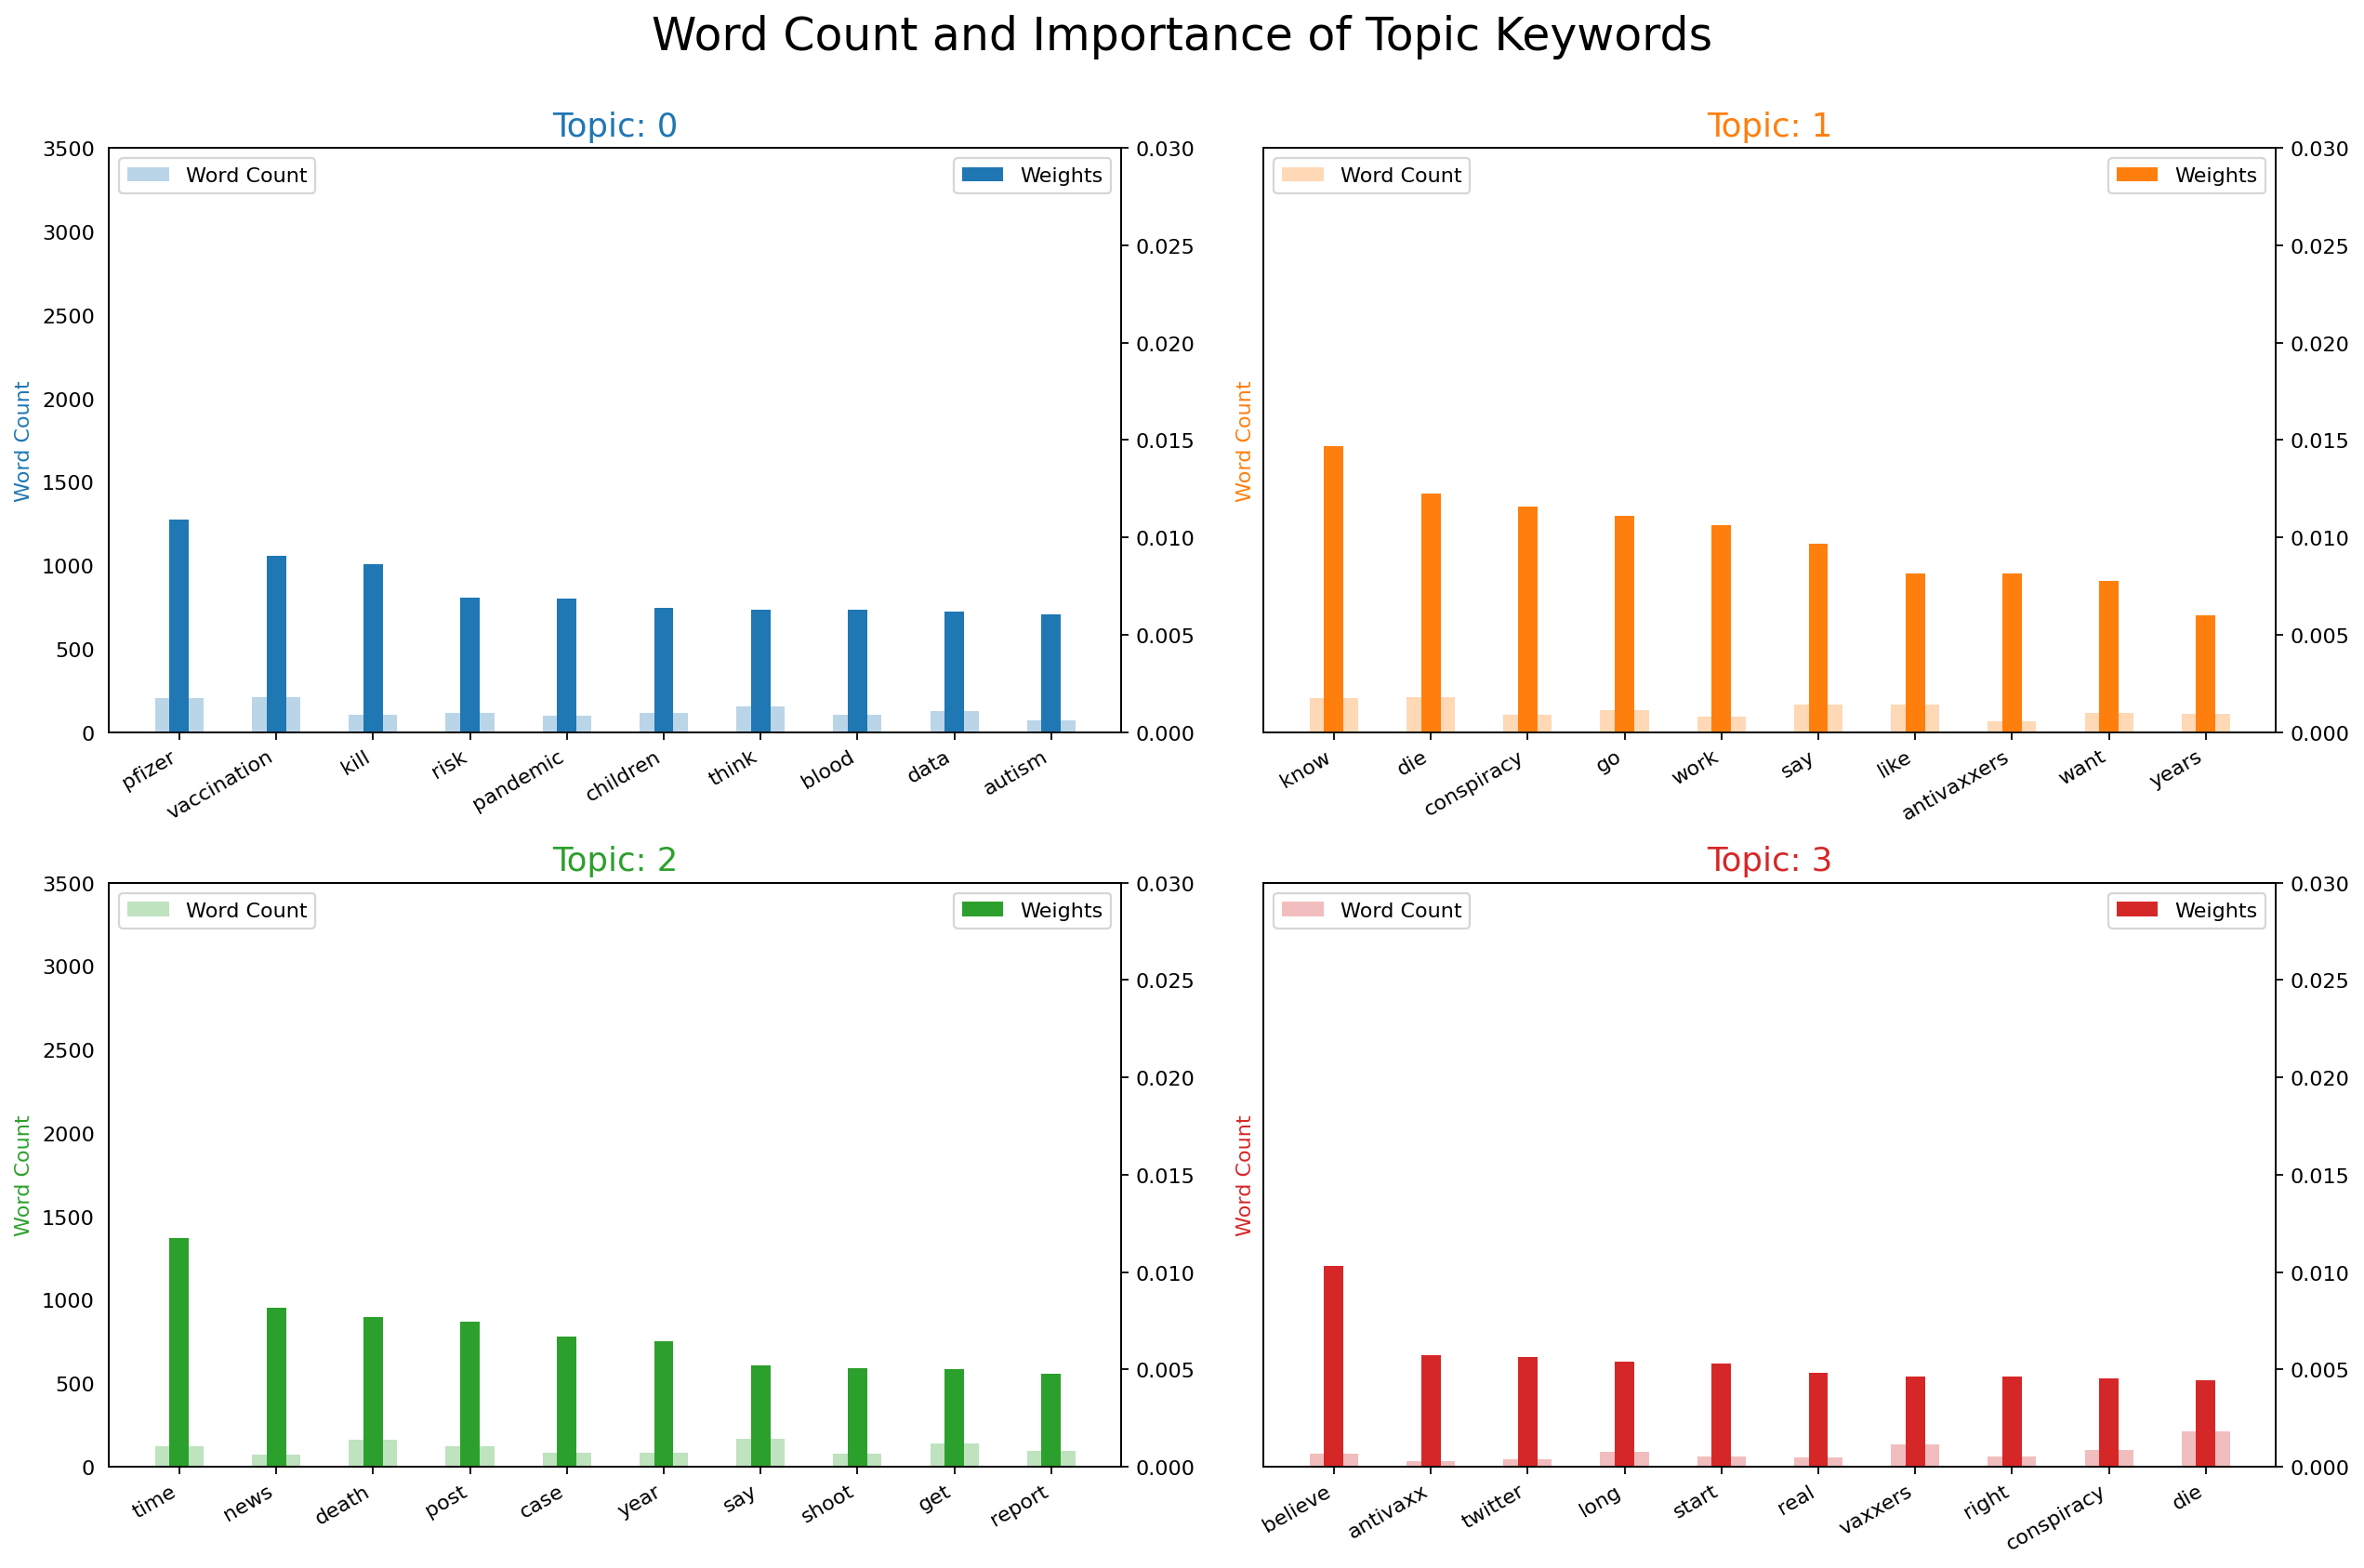

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in filtered_corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()


In [ ]:
#I am not able to see clear topics from these graphs. Should I remove more words (vaxxer, conspiracy, death)

ValueError: ignored

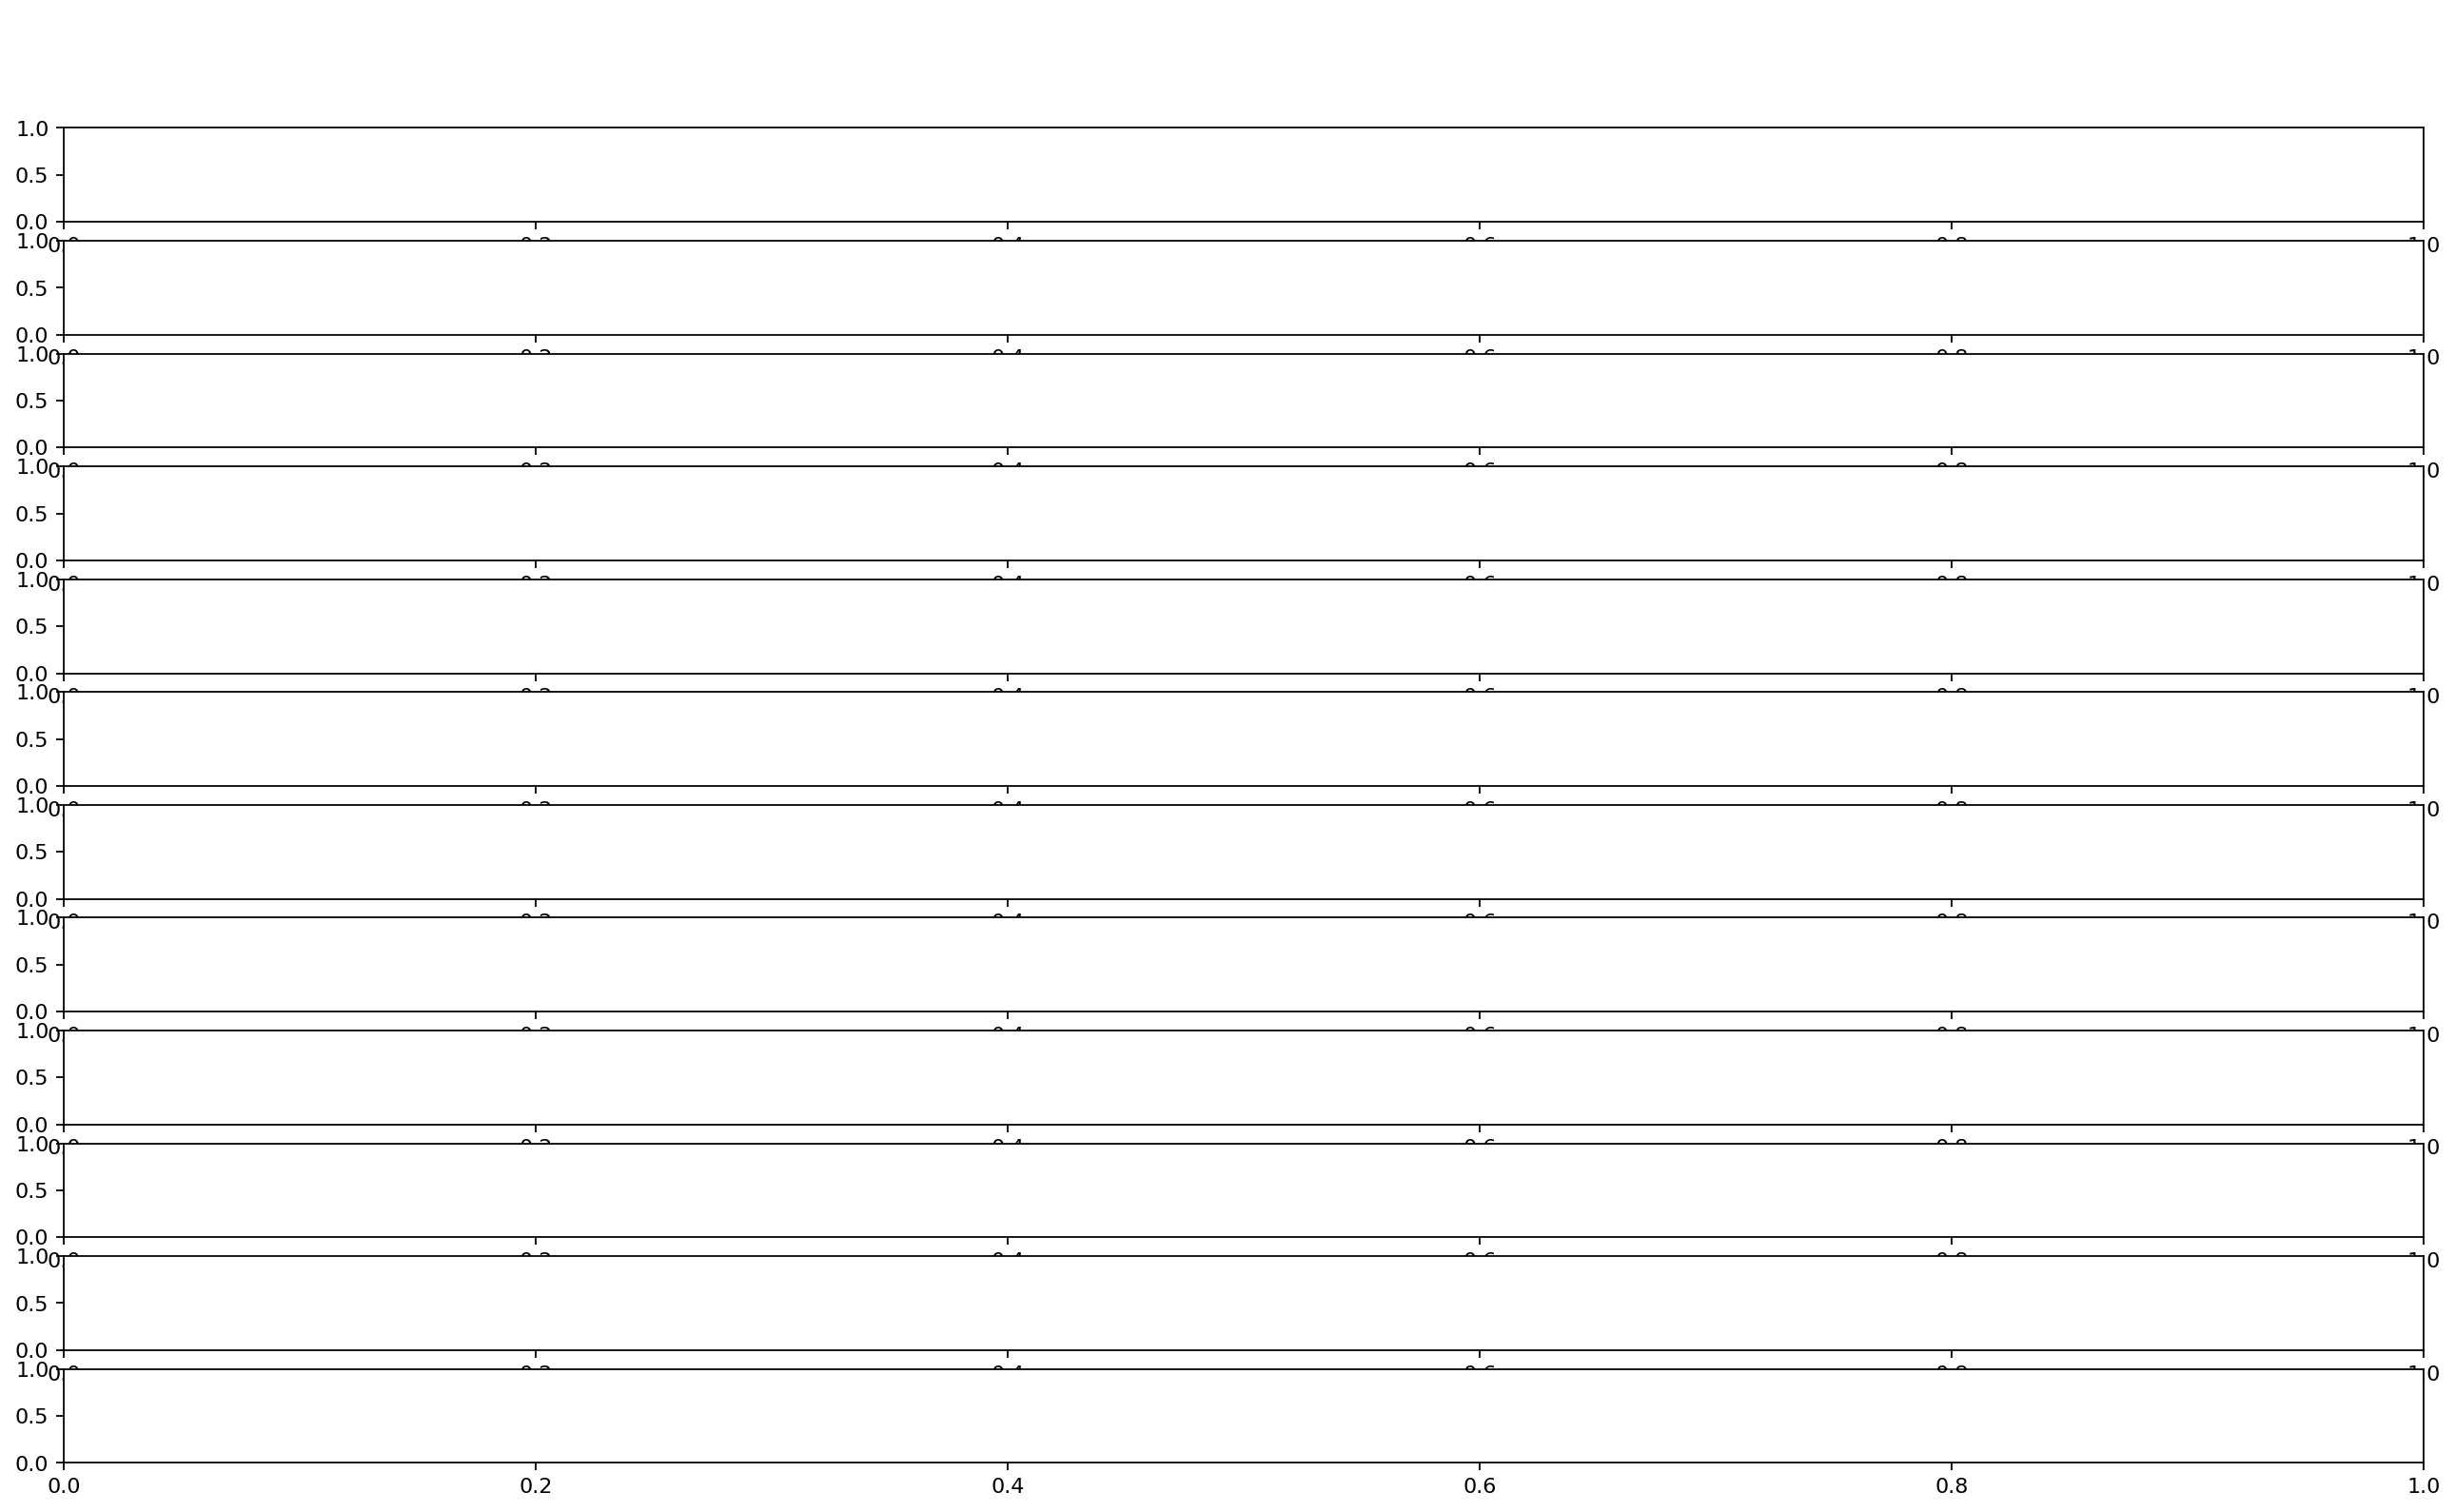

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=bow_corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=bow_corpus, end=-1)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

In [ ]:
#graphing tutorial https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/?utm_content=cmp-true

In [ ]:
import tomotopy as tp
term_weight = tp.TermWeight.ONE
hdp = tp.HDPModel(tw=term_weight, min_cf=5, rm_top=7, gamma=1,
                  alpha=0.1, initial_k=10, seed=99999)